# Setup

**Imports**

In [87]:
import numpy as np
from dtw import dtw
from tqdm import tqdm
from sklearn.neighbors import KNeighborsClassifier as knn 
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from loadmydata.load_human_locomotion import (
    load_human_locomotion_dataset,
    get_code_list,
)
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, make_scorer

**Utility functions**

In [2]:
def fig_ax(figsize=(15, 5)):
    fig, ax = plt.subplots(figsize=figsize)
    ax.autoscale(enable=True, axis='x', tight=True)
    return fig, ax

# Spectral feature

## Question 6

In [88]:
# first let's define our function of interest gamma_est(tau) : 
def gamma_est(tau, N, data):
    """
    A function to compute the gamma estimated
    """
    res = (1/N) * sum(data[n] * data[n + tau] for n in range(0, N - tau))
    return res 

# a function to generate data 
def generate_data(N):
    return np.random.randn(100, N)
    

100%|██████████| 100/100 [00:00<00:00, 127.56it/s]
c:\Users\zakar\anaconda3\envs\deep_learning_iot\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
100%|██████████| 100/100 [00:04<00:00, 22.05it/s]
c:\Users\zakar\anaconda3\envs\deep_learning_iot\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
100%|██████████| 100/100 [00:18<00:00,  5.28it/s]
c:\Users\zakar\anaconda3\envs\deep_learning_iot\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


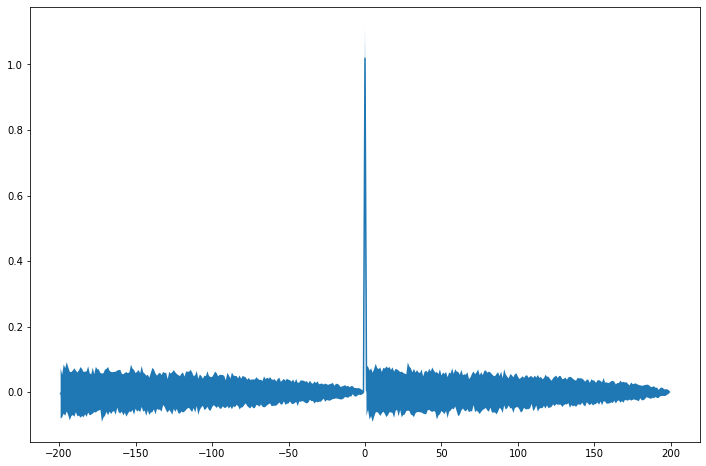

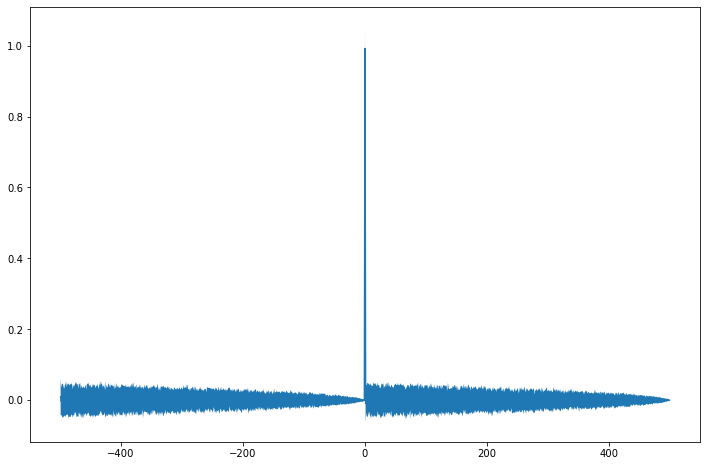

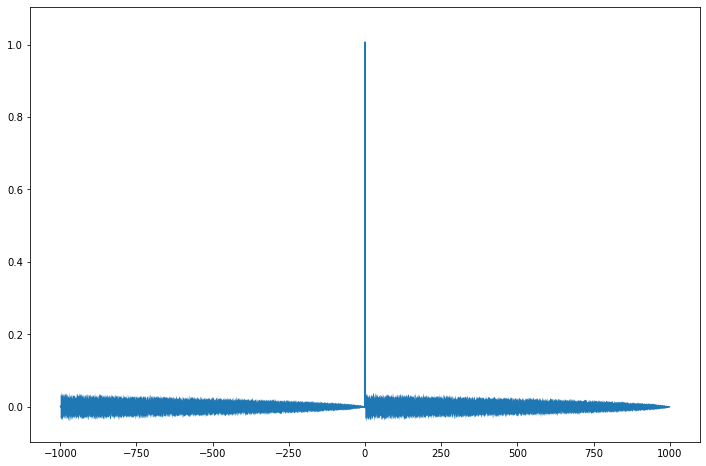

In [16]:
# This is an example of plot (random data). You can change it if you want.

## Change the following lines
# tau can go from 0 to N-1 and from -(n-1) to -1 
for j, N in enumerate([200, 500, 1000]):
    fig, axes = plt.subplots(1, 1 , figsize = (12,8))

    periodograms = generate_data(N)  # shape (n_trials, n_freqs)
    taus = np.arange(-(N-1), N)
    ##
    gamma_ests = []
    for i in tqdm(range(100)):
        temp = np.array([gamma_est(tau, N, periodograms[i]) for tau in range(N)])
        gamma_ests.append(np.concatenate((-temp[1:], temp)))
    gamma_est_avg = np.mean(gamma_ests, axis= 0 )
    gamma_est_std = np.std(gamma_ests, axis = 0)
    axes.plot(taus, gamma_est_avg)
    axes.fill_between(taus, gamma_est_avg - gamma_est_std, gamma_est_avg + gamma_est_std)
    fig.show()
# fig, ax = fig_ax(figsize=(9, 5))

# avg = periodograms.mean(axis=0)
# std = periodograms.std(axis=0)
# ax.plot(freqs, avg, 'k-')
# ax.fill_between(freqs, avg-std, avg+std, alpha=0.5)


100%|██████████| 100/100 [00:06<00:00, 14.35it/s]
c:\Users\zakar\anaconda3\envs\deep_learning_iot\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
100%|██████████| 100/100 [00:43<00:00,  2.32it/s]
c:\Users\zakar\anaconda3\envs\deep_learning_iot\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
100%|██████████| 100/100 [02:54<00:00,  1.74s/it]
c:\Users\zakar\anaconda3\envs\deep_learning_iot\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


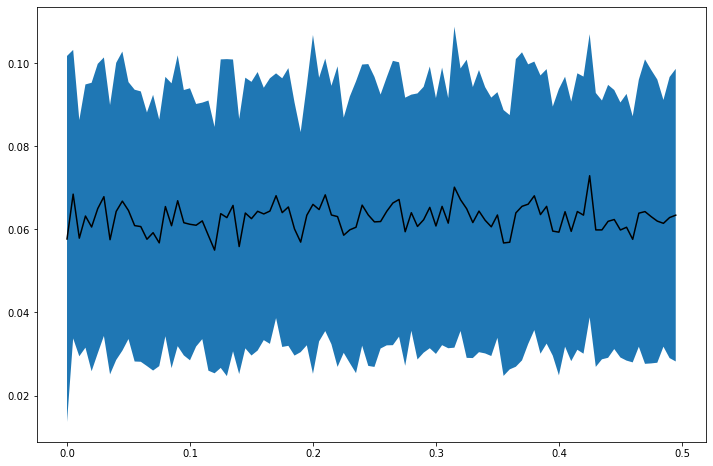

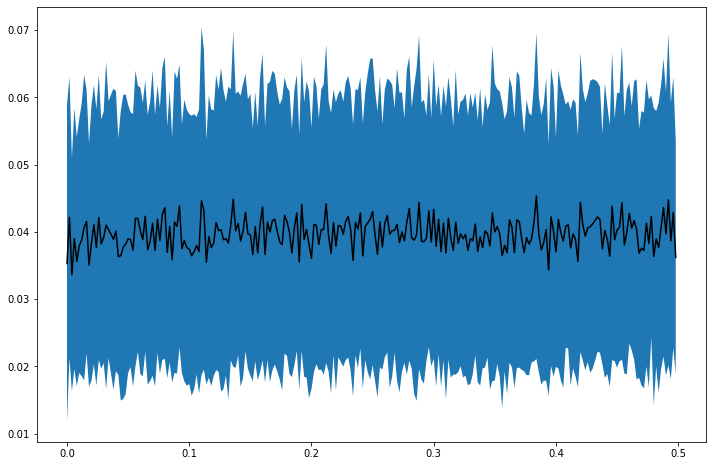

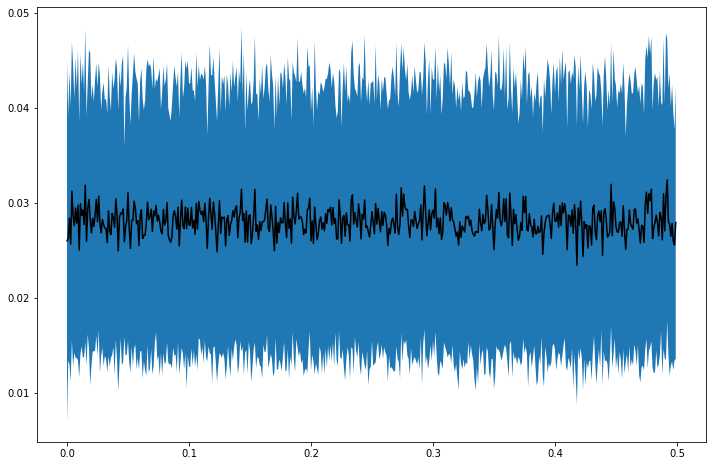

In [4]:
# Now let's plot the periodograms
def J_k (k, N , data ):
    return (1 / N) * np.abs(sum(data[n] * np.exp(-1j * 2 * np.pi *k * n / N) for n in range(N)))

for j, N in enumerate([200, 500, 1000]):
    fig, axes = plt.subplots(1, 1 , figsize = (12,8))

    periodograms = generate_data(N)  # shape (n_trials, n_freqs)
    frqs = [k/N for k in range(int(N +1)//2)]
    ##
    j_ks = []
    for i in tqdm(range(100)):
        temp = np.array([J_k(k, N, periodograms[i]) for k in range(int(N +1)//2)])
        j_ks.append(temp)
    j_ks_avg = np.mean(j_ks, axis= 0 )
    j_ks_std = np.std(j_ks, axis = 0)
    axes.plot(frqs, j_ks_avg, 'k-')
    axes.fill_between(frqs, j_ks_avg - j_ks_std, j_ks_avg + j_ks_std)
    fig.show()


## Question 9

100%|██████████| 100/100 [00:35<00:00,  2.82it/s]


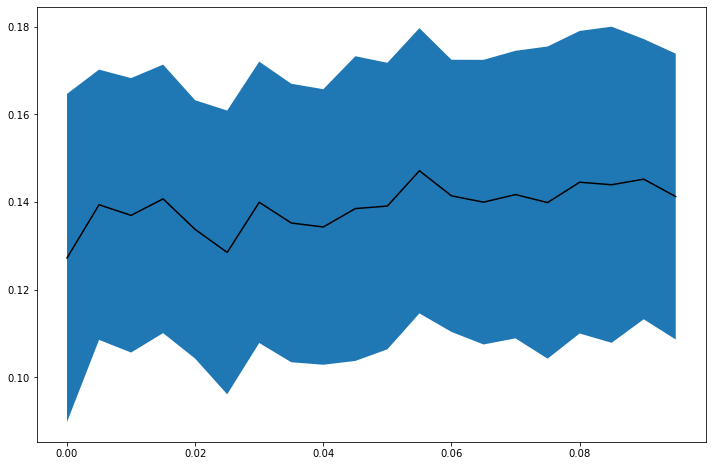

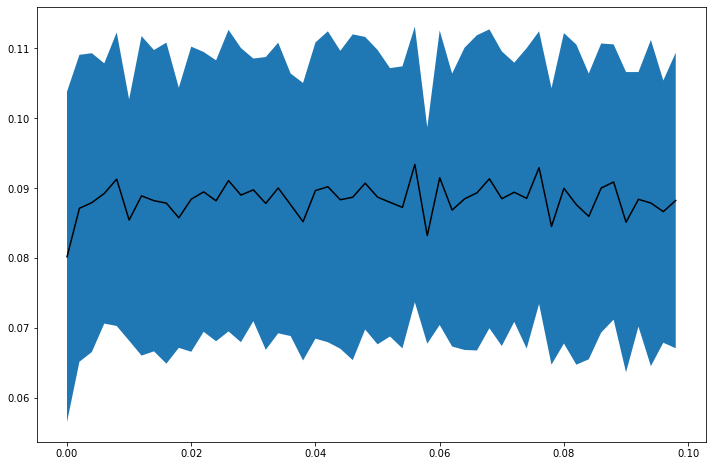

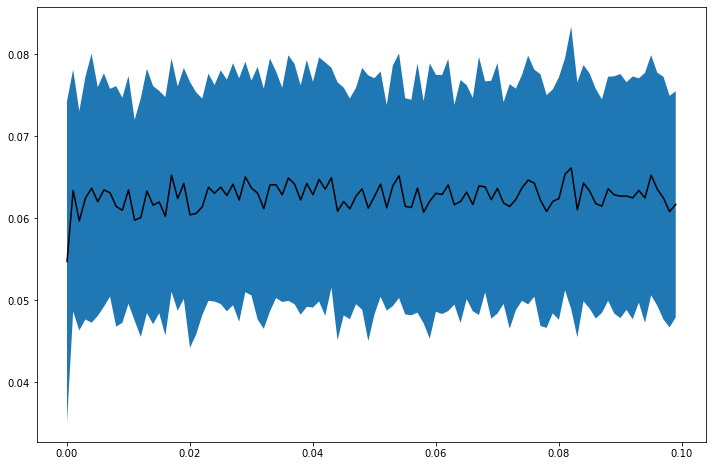

In [21]:
# Bartlett's procedure 
# Now let's plot the periodograms
import warnings
warnings.filterwarnings('ignore')
def J_k (k, N , data ):
    return (1 / N) * np.abs(sum(data[n] * np.exp(-1j * 2 * np.pi *k * n / N) for n in range(N)))

for j, N in enumerate([200, 500, 1000]):
    fig, axes = plt.subplots(1, 1 , figsize = (12,8))

    periodograms = generate_data(N)  # shape (n_trials, n_freqs)
    frqs = [k/N for k in range(N//10)]
    ##
    j_ks = []
    for i in tqdm(range(100)):
        j_k = []
        for d in range(1, 6):
            temp = np.array([J_k(k, N // 5, periodograms[i][(d-1) * N//5: d * N//5 ]) for k in range(N // 10)])
            j_k.append(temp)
        j_ks.append(np.mean(j_k, axis = 0))

    j_ks_avg = np.mean(j_ks, axis= 0 )
    j_ks_std = np.std(j_ks, axis = 0)
    axes.plot(frqs, j_ks_avg, 'k-')
    axes.fill_between(frqs, j_ks_avg - j_ks_std, j_ks_avg + j_ks_std)
    fig.show()


# Dynamic time warping (DTW)

## Data

This data set consists of signals collected with inertial measurement units (accelerometer+gyroscope), from 230 subjects undergoing a fixed protocol:
- standing still,
- walking 10 m,
- turning around,
- walking back,
- stopping.

In this assignment, we only consider the vertical acceleration of the left foot and all signals are truncated to 20 seconds (as a result, they all have same length). Signals are sampled at 100 Hz.

The measured population is composed of healthy subjects as well as patients with neurological or orthopedic disorders.

The start and end time stamps of thousands of footsteps are available.

The data are part of a larger data set described in [1].

[1] Truong, C., Barrois-Müller, R., Moreau, T., Provost, C., Vienne-Jumeau, A., Moreau, A., Vidal, P.-P., Vayatis, N., Buffat, S., Yelnik, A., Ricard, D., & Oudre, L. (2019). A data set for the study of human locomotion with inertial measurements units. Image Processing On Line (IPOL), 9.

**The task** is to classify footsteps in healthy/non-healthy.

The following cell defines the training set `(X_train, y_train)` and testing set `(X_test, y_test)`.

In [22]:
subset_indexes_train = [95, 619, 441, 149, 951, 803, 214, 34, 37, 630]
subset_indexes_test = [683, 259, 59, 387, 634]

code_list = get_code_list()

X_train = list()  # list of footstep signals
y_train = list()  # list of pathologies (the "labels")

for code in np.take(code_list, subset_indexes_train):
    single_trial = load_human_locomotion_dataset(code)
    signal = single_trial.signal.LAZ.to_numpy()  # keeping only one dimension (from the left sensor)
    steps = single_trial.left_steps
    pathology = single_trial.metadata["PathologyGroup"]
    label = 0 if pathology=="Healthy" else 1  # 0: healthy, 1: non-healthy
    for (start, end) in steps:
        X_train.append(signal[start:end])
        y_train.append(label)

        
X_test = list()  # list of footstep signals
y_test = list()  # list of pathologies (the "labels")

for code in np.take(code_list, subset_indexes_test):
    single_trial = load_human_locomotion_dataset(code)
    signal = single_trial.signal.LAZ.to_numpy()  # keeping only one dimension (from the left sensor)
    steps = single_trial.left_steps
    pathology = single_trial.metadata["PathologyGroup"]
    label = 0 if pathology=="Healthy" else 1  # 0: healthy, 1: non-healthy
    for (start, end) in steps:
        X_test.append(signal[start:end])
        y_test.append(label)

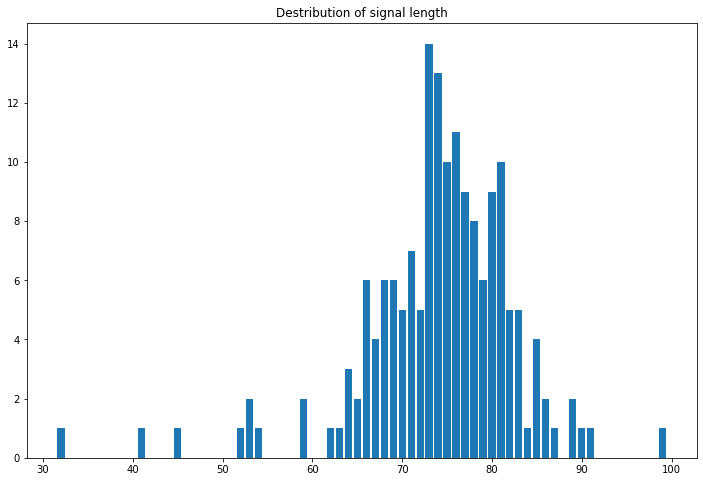

In [24]:
yy = np.unique([len(x) for x in X_train], return_counts= True)
plt.figure(figsize= (12,8))
plt.bar(yy[0], yy[1])
plt.title('Destribution of signal length')
plt.show()

## Question 10

In [34]:
def dtw_distance(signal_1, signal_2):
    return dtw(signal_1, signal_2, keep_internals=True).distance

In [43]:
# giving the structure of the data we need to implement knn from scratch
class KNN:
    def __init__(self, k ):
        self.k = k

    def fit(self, X_train, y_train):
        self.x = X_train
        self.y = y_train

    def get_params(self, deep = True):
        return {'k': self.k}
    def set_params(self, **params):
        self.k = params['k']

    def find_neighbors(self, instance):
        distances = [dtw_distance(instance, x) for x in self.x]
        nearest_indices = np.argsort(distances)[:self.k]
        return nearest_indices
        
    def knn_predict(self, instance):
        nearest_indices = self.find_neighbors(instance)
        nearest_labels = [self.y[i] for i in nearest_indices]
        return max(set(nearest_labels), key=nearest_labels.count)

    def predict(self, X_test):
        if type(X_test[0]) == np.float64:
            return np.array([self.knn_predict(X_test)])
        else:
            return np.array([self.knn_predict(x) for x in X_test])        

In [64]:
best_k = 1
score_best = 0
scores = []
for k in tqdm(range(1, 20)):
    model = KNN(k)
    model.fit(X_train, y_train)
    temp = np.mean(cross_val_score(KNN(k), X_train, y_train, cv = 5, scoring= make_scorer(f1_score)))
    scores.append(temp)
    if score_best < temp:
        best_k = k
        score_best =temp


100%|██████████| 19/19 [04:56<00:00, 15.60s/it]


In [66]:
model = KNN(best_k)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [89]:
print(f'The best k found with 5-fold cross validation is {best_k} and the best average score is {score_best}')

The best k found with 5-fold cross validation is 1 and the best average score is 0.6138095238095238


## Question 11

In [78]:
model = KNN(best_k)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

33


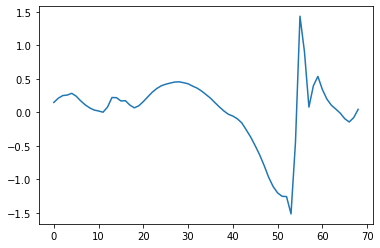

In [85]:
y_test = np.array(y_test)

# for healthy that was classifier as not_healthy 
index = np.where((y_pred != y_test) & (y_test == 0))[0][0]
print(index)
# displaying the step
plt.plot(X_test[index])

0


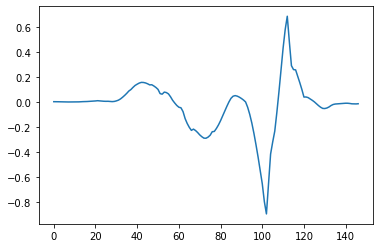

In [86]:
# for non healthy that was classifier as healthy 
index = np.where((y_pred != y_test) & (y_test == 1))[0][0]
print(index)
# displaying the step
plt.plot(X_test[index])